# **Importing libraries**

In [ ]:
%matplotlib inline
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense

# **Data loading and visualising.**

In [ ]:
data = pd.read_csv('/content/zoo.csv')
data.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


1. We can see their is a column animal_name which is no use for us in predictions.
2. Column class_type is column to be predicted, so lets plot a graph to get some information about it.

<Axes: ylabel='count'>

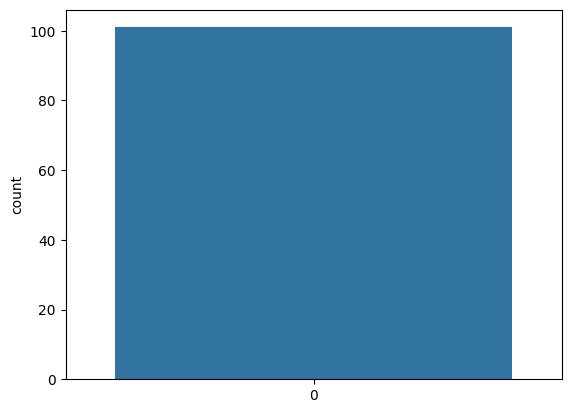

In [ ]:
sns.countplot(data.iloc[:, -1:].values.flatten())

1. Now lets check is their any empty values which we should take care of.

In [ ]:
data.isna().sum()

animal_name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
class_type     0
dtype: int64

# **Dividing data into training and testing parts**

In [ ]:
X = data.iloc[:, 1:-1].values # iloc is function for indexing of dataframes.
Y = data.class_type.values

# OneHotEncoding
encoder = OneHotEncoder() # using encoding of class_type as this is a multi class problem.
Y = encoder.fit_transform(Y.reshape(-1,1)).toarray() # fitting our data to encoder.

X, Y

(array([[1, 0, 0, ..., 0, 0, 1],
        [1, 0, 0, ..., 1, 0, 1],
        [0, 0, 1, ..., 1, 0, 0],
        ...,
        [1, 0, 0, ..., 1, 0, 1],
        [0, 0, 1, ..., 0, 0, 0],
        [0, 1, 1, ..., 1, 0, 0]]),
 array([[1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 1.],
        [0., 1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0.

In [ ]:
# train_test_split is a function used to split our data for training and testing purpose.
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, test_size=0.2)

In [ ]:
# checking if the shapes of our data is correct.
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((80, 16), (21, 16), (80, 7), (21, 7))

# **Creating Our Model**

In [ ]:
# creating model
model = Sequential()

# adding hidden layers with number of units and activation function.
model.add(Dense(units = 20, activation = 'relu', input_dim = 16)) #hiddenlayer1 with and extra parameter input dimensions which is 16 in out case that is no. of features in training data.
model.add(Dense(units = 10, activation = 'relu')) #hiddenlayer2
model.add(Dense(units = 7, activation = 'sigmoid')) #outputlayer

# compiling our model.
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy']) #metrics are the list of parameters on which we test our model like accuracy.

In [ ]:
# fitting data to train our model and then validating score with validation_data.
model.fit(x_train, y_train, epochs=40, batch_size=8, validation_data=(x_test, y_test))

Epoch 1/40
10/10 [==============================] - 0s 10ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0225 - val_accuracy: 1.0000
Epoch 2/40
10/10 [==============================] - 0s 6ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0220 - val_accuracy: 1.0000
Epoch 3/40
10/10 [==============================] - 0s 6ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0227 - val_accuracy: 1.0000
Epoch 4/40
10/10 [==============================] - 0s 6ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.0232 - val_accuracy: 1.0000
Epoch 5/40
10/10 [==============================] - 0s 6ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.0241 - val_accuracy: 1.0000
Epoch 6/40
10/10 [==============================] - 0s 8ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.0246 - val_accuracy: 1.0000
Epoch 7/40
10/10 [==============================] - 0s 6ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.0255 - val_accuracy: 1.0000
Epoch 8/40
10/10 [=

In [ ]:
# printing score with evaluate
print(model.evaluate(x_test, y_test)[1])

1/1 [==============================] - 0s 39ms/step - loss: 0.0248 - accuracy: 1.0000
1.0


In [ ]:
y_pred_con = model.predict(x_test)
y_pred, y_correct = [], []

for i in y_test:
    y_correct.append(np.argmax(i))
for j in y_pred_con:
    y_pred.append(np.argmax(j))

pred_df = pd.DataFrame()
pred_df['Pred_class'] = y_pred
pred_df['Correct_class'] = y_correct
pred_df

1/1 [==============================] - 0s 89ms/step


,Pred_class,Correct_class
0,6,4
1,3,3
2,3,3
3,0,0
4,0,0
5,0,0
6,1,1
7,3,3
8,0,0
9,0,0


In [ ]:
confusion_matrix(y_pred, y_correct)